# Predicting Heart disease with machine learning using Scikit Learn 

This notebook use Python based machine learning algorithms and data science libraries in an attempt to build a machine learning model capable of predicting whether or not a person has heart disease baset on their medical attributes

We are going to use the following method:
- Problem definition 
- Data
- Evaluation
- Features
- Modeling 
- Experimentation

## Problem definition:

- Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## Data: 

The original data is from Cleveland, from the UCI machine learning repository, and there is also a version in kaggle
- UCI ML repositoy: https://archive.ics.uci.edu/ml/datasets/heart+Disease
- Kaggle: https://www.kaggle.com/ronitf/heart-disease-uci

## Evaluation: 
- If we can reach at least 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll purse the project

## Features:

#### Create a data dictionary
this is where you will get different information about each of the features in the data

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)


## Preparing the tools
we're going to use pandas, matplotlib, and numpy for data manipulation

In [1]:
# import all the tools we need

# EDA (Exploratory data analysis) and ploting libraries 
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Models from Sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, recall_score, precision_score, plot_roc_curve

## Load data

In [2]:
df = pd.read_csv('data/heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploratory data analisys
the goal is to find out more about the data and become a subject matter expert on the dataset you are working with 
- what question are you trying to solve?
- what kind of data do we ahve and how we treat different types
- What is missing from the data and how do you deal with it 
- Where are the outliers and why should we care about them?
- how can you add, change or remove features to get more out of your data

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
# find out how many of each class we have
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

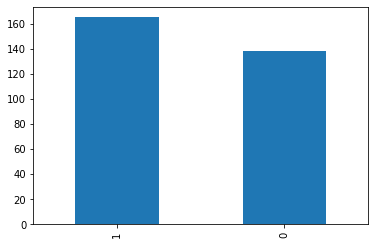

In [5]:
df['target'].value_counts().plot(kind = 'bar');

In [1]:
df.info()

NameError: name 'df' is not defined

In [7]:
# are there missing values?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Heart disease acording to sex

In [9]:
df['sex'].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [10]:
# compare target colunmn with sex column
pd.crosstab(df['target'], df['sex'])

sex,0,1
target,,
0,24,114
1,72,93


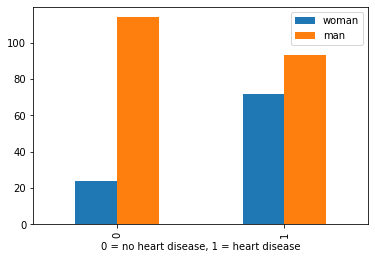

In [11]:
# plot of the crosstab
pd.crosstab(df['target'], df['sex']).plot(kind = 'bar')
plt.xlabel('0 = no heart disease, 1 = heart disease')
plt.legend(['woman','man'])

### Age vs Max heart rate vs Heart disease

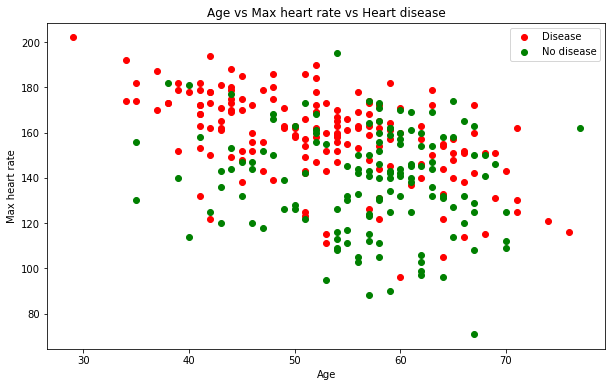

In [12]:
plt.figure(figsize=(10,6))
# scatter with positive samples
plt.scatter(
    df['age'][df['target']==1],
    df['thalach'][df['target']==1],
    c = 'red'
)

# scatter with negative samples
plt.scatter(
    df['age'][df['target']==0],
    df['thalach'][df['target']==0],
    c = 'green'
)

# add info
plt.title('Age vs Max heart rate vs Heart disease')
plt.xlabel('Age')
plt.ylabel('Max heart rate')
plt.legend(['Disease','No disease'])

plt.show()

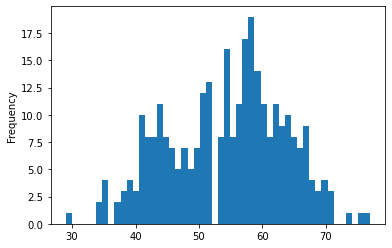

In [13]:
# distribution of the age with a histogram
df['age'].plot.hist(bins = 50);

### Heart disease frequency in fucntion of chest pain type

cp - chest pain type:
- 0: Typical angina: chest pain related decrease blood supply to the heart
- 1: Atypical angina: chest pain not related to heart
- 2: Non-anginal pain: typically esophageal spasms (non heart related)
- 3: Asymptomatic: chest pain not showing signs of disease

In [14]:
pd.crosstab(df['cp'],df['target'])

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


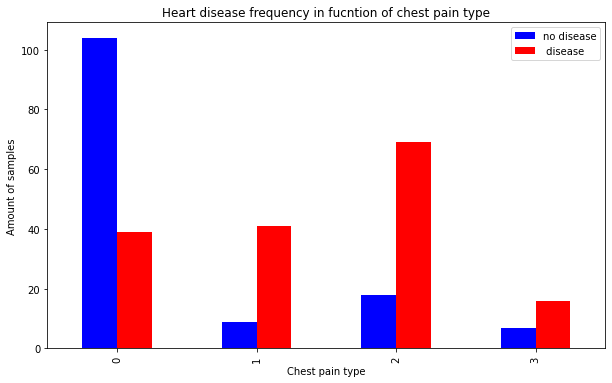

In [15]:
# make de crosstab prettier 
pd.crosstab(df['cp'],df['target']).plot(kind = 'bar', figsize = (10,6), color = ['blue', 'red'])

# add some information
plt.title('Heart disease frequency in fucntion of chest pain type')
plt.xlabel('Chest pain type')
plt.ylabel('Amount of samples')
plt.legend(['no disease',' disease'])

In [16]:
# make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


In [2]:
# Make the correlation matrix prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (15,10))
ax = sns.heatmap(
    corr_matrix, 
    annot = True, 
    linewidths = 0.5,
    fmt = '0.2f', 
    cmap = 'OrRd'
)

NameError: name 'df' is not defined

## Modeling

In [18]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [19]:
# split data into X and y
X = df.drop(labels = 'target', axis= 1)
y = df['target']
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [20]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [21]:
# split data into train and test sets
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [22]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


We're goingt to build a machine learning model and train it on the test dataset (find patterns) and test it (use the patterns) on the test data

We're going to test 3 different machine learning models:
 - Logistic Regression
 - K-neartest Neighbours Classifier
 - Random forest classifier 

In [23]:
# Put the models in a dictionary
models = {
    'Logistic Regression' : LogisticRegression(),
    'KNN' : KNeighborsClassifier(),
    'Random Forest Clf' : RandomForestClassifier()
}

# create a function to fit and score models 
def fit_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates machine learning models
    models:  a dictionary of sklearn models
    X_train: train data (no labels)
    X_test: test data (no labels)
    y_train: training labels
    y_test: test labels
    """
    np.random.seed(42)
    # dictionary for model scores
    scores = {}
    for name, model in models.items():
        # fit the model 
        model.fit(X_train, y_train)
        # Evaluate the model
        scores[name] = model.score(X_test, y_test)
        
    return scores

In [24]:
model_scores = fit_score(models, X_train, X_test, y_train, y_test)
model_scores

C:\Users\jluna\Desktop\heart_disease_ml\env\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Clf': 0.8360655737704918}

## Stock model comparison

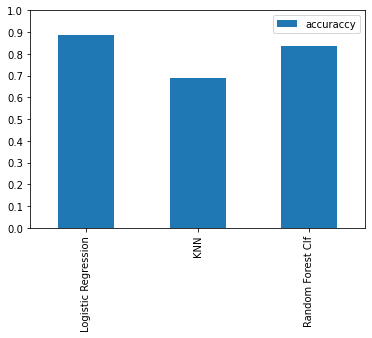

In [25]:
model_compare = pd.DataFrame(model_scores, index = ['accuraccy'])
model_compare.T.plot.bar()
plt.yticks(np.linspace(0,1,11))
plt.show()

Now we have a baseline model and we know a model's first predictions arent always what we should based our next steps off; What should we do?

lets look at the following:
 - Hyperparameter tuning
 - Feature Importance
 - Confusion matrix
 - Cross Validation
 - Precision
 - Recall
 - F1 Score
 - Classification report
 - ROC curve
 - Area under the curve (AUC)
 
 ### Hyperparameter tuning

In [26]:
# tune knn
train_scores = []
test_scores = []

# list with different values for n-neighbours 
neighbors = range(1,21)

# knn instance
knn = KNeighborsClassifier()

# test different params with a loop
for i in neighbors:
    knn.set_params(n_neighbors = i)
    # fit the model
    knn.fit(X_train, y_train)
    
    # update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # update the test scores list
    test_scores.append(knn.score(X_test, y_test))
    

In [27]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [28]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

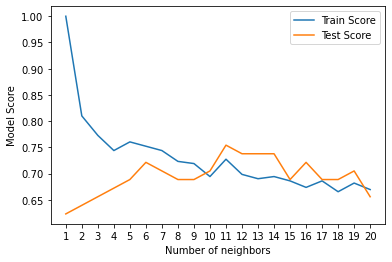

Max KNN Accuraccy on test data: 75.41


In [29]:
plt.plot(neighbors, train_scores, label = 'Train Score')
plt.plot(neighbors, test_scores,  label = 'Test Score')
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.xticks(np.arange(1,21,1))
plt.legend()
plt.show()
print(f'Max KNN Accuraccy on test data: {max(test_scores)*100:.2f}')

## Hyperparameter tuning using RandomizedSearchCV
we're going to tune:
 - `LogisticRegression()`
 - `RandomForestClassifier()`
 
using `RandomizedSearchCV`

In [30]:
# create a hyperparameter grid for logistic regression
logistic_regression_grid = {
    'C': np.logspace(-4,4,20),
    'solver': ['liblinear']
}

# hyperparameter grid for RandomForestClassifierabs
random_forest_grid = {
    'n_estimators': np.arange(10,1000, 50),
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': np.arange(2,20,2),
    'min_samples_leaf': np.arange(1,20,2)
}

### Tune Logistic Regression

In [31]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(
    LogisticRegression(),
    param_distributions = logistic_regression_grid,
    cv = 5,
    n_iter = 20,
    verbose = True
)

# Fit random hyperparameter search for logistic regression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [32]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [33]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

### Tune RandomForestClassifier

In [34]:
np.random.seed(42)

random_search_rf = RandomizedSearchCV(
    RandomForestClassifier(),
    param_distributions = random_forest_grid,
    cv = 5,
    n_iter = 25,
    verbose = True
)

# Fit random search for random forest classifier
random_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=25,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [35]:
# find the best parameters
random_search_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [36]:
# Evaluate the randomized search Randomforestclassifier model 
random_search_rf.score(X_test, y_test)

0.8688524590163934

In [37]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Clf': 0.8360655737704918}

## Hyperparameter tuning using gridsearchCV
The logisticRegression model provides the best scores, lets try to improve it using `GridSearchCV`

In [38]:
# new hyperparameter grid for the logistic regression model
logistic_regression_grid = {
    'C': np.logspace(-4,4,30),
    'solver': ['liblinear']
} 

# GrindHyperparameterSearch

gs_logistic_regression = GridSearchCV(
    LogisticRegression(),
    param_grid = logistic_regression_grid,
    cv = 5,
    verbose = True
)

# Fit the gridsearchcv model
gs_logistic_regression.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [39]:
gs_logistic_regression.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [40]:
# Evaluate the GridSearch logistig regression model
gs_logistic_regression.score(X_test, y_test)

0.8852459016393442

In [41]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest Clf': 0.8360655737704918}

## Evaluating the tuned machine learning classifier
 - ROC curve and area under the curve
 - Confusion matrix
 - Classification Report
 - Precision
 - Recall
 - F1 Score
 
and use cross validation when possible. 

To make comparisons and evaluate the model first we need to make predictions

In [42]:
# make predictions with the tune model 
y_preds = gs_logistic_regression.predict(X_test)


In [43]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [44]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

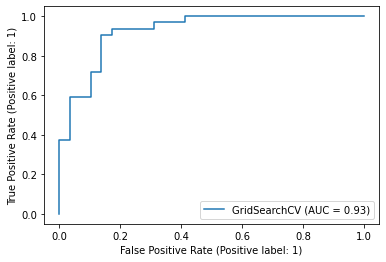

In [45]:
# plot ROC function and calculate area under the curve
plot_roc_curve(gs_logistic_regression, X_test, y_test)

In [46]:
# Confusion matrix
confusion_matrix(y_test,y_preds)

array([[25,  4],
       [ 3, 29]], dtype=int64)

In [3]:
# use seaborn to make prettier the confussion matrix xd
sns.set(font_scale = 2)
def conf_matrix(y_true, y_preds):
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(
        confusion_matrix(y_true,y_preds),
        annot=True,
        cbar = False,
        fmt = 'g'
    ) 
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
conf_matrix(y_test,y_preds)

NameError: name 'sns' is not defined

In [48]:
# Classification report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Use cross-validation to calculate evaluetion metrics

we're going to calculate precision, recall and F1-score, using cross validation with `cross_val_score`

In [49]:
# check the best params for the logistic regression model
gs_logistic_regression.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [50]:
# new logistic regression model with the best hyperparameters
clf = LogisticRegression(
    C = 0.20433597178569418,
    solver = 'liblinear'
)

#### Use cross vall score and the scoring parameter to get the classifier evaluation metrics

In [51]:
# Cross-validated accuracy
cv_accuracy = cross_val_score(
    clf,
    X,
    y,
    scoring = 'accuracy'
)
cv_accuracy = np.mean(cv_accuracy)
cv_accuracy

0.8446994535519124

In [52]:
# Cross-validated precision
cv_precision = cross_val_score(
    clf,
    X,
    y,
    scoring = 'precision'
)
cv_precision = np.mean(cv_precision)
cv_precision

0.8207936507936507

In [53]:
# Cross-validated recall
cv_recall = cross_val_score(
    clf,
    X,
    y,
    scoring = 'recall'
)
cv_recall = np.mean(cv_recall)
cv_recall

0.9212121212121213

In [54]:
# Cross-validated f1-score
cv_f1 = cross_val_score(
    clf,
    X,
    y,
    scoring = 'f1'
)
cv_f1 = np.mean(cv_f1)
cv_f1

0.8673007976269721

In [57]:
# Visualize cross validated metrics
cv_metrics= pd.DataFrame({
    'Accuracy': cv_accuracy,
    'Precision': cv_precision,
    'Recall': cv_recall,
    'F1 Score': cv_f1
}, index = [0])

cv_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.844699,0.820794,0.921212,0.867301


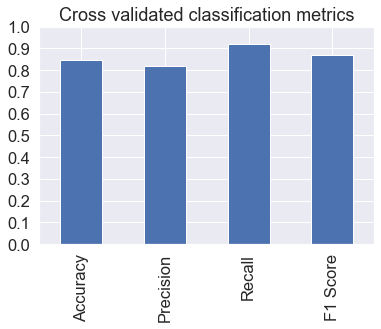

In [78]:
sns.set(font_scale = 1.5)
cv_metrics.T.plot.bar(title = 'Cross validated classification metrics', legend = False)
plt.yticks(np.linspace(0,1,11));

### Feature importance
is another as asking 'Wich features contributed most to the outcomes of the model and how did they contribute?'

finding feature importance is different for each machine learning model. one way is to search (model name) feature importance

Lets find the feature importance for the LogisticRegression model:

In [69]:
# create an instance of LogisticRegression with the best params
clf = LogisticRegression(C = 0.20433597178569418, solver = 'liblinear')

clf.fit(X_train, y_train);

In [70]:
# check coef_
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [73]:
# match coef_ features to columns 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

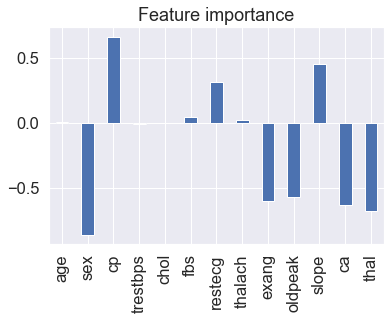

In [82]:
# visualize feature importance 
feature_df = pd.DataFrame(feature_dict, index = [0])
feature_df.T.plot.bar(title = 'Feature importance', legend = False);